In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('credit risk/credit_risk_dataset.csv')

In [4]:
char_col = df.select_dtypes(include = 'O')
num_col = df.select_dtypes(exclude = 'O')

### Handling missing values

In [5]:
for i in df.columns:
    if df[i].isnull().sum():
        print(f"{i}: {df[i].isnull().sum()} missing values.")

person_emp_length: 895 missing values.
loan_int_rate: 3116 missing values.


In [6]:
char_col

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


Median: 4.0
Mean: 4.789686296787225
Data is skewed here and there is difference in mean and median, we will choose median here  because the data is skewed.


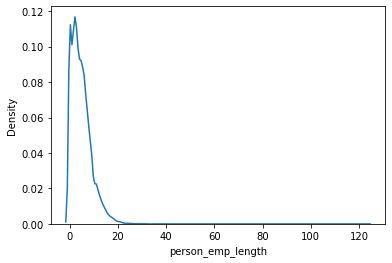

In [7]:
sns.kdeplot('person_emp_length', data = df)
print("Median:",df['person_emp_length'].median())
print("Mean:",df['person_emp_length'].mean())
print("Data is skewed here and there is difference in mean and median, we will choose median here  because the data is skewed.")

Median: 10.99
Mean: 11.01169489224439
A tiny bit of difference in mean and median, we will choose median here.


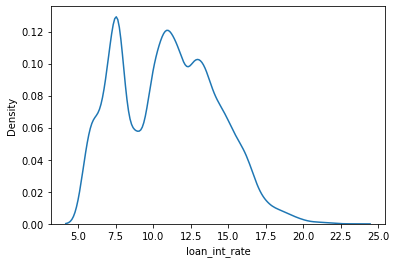

In [8]:
sns.kdeplot('loan_int_rate', data = df)
print("Median:",df['loan_int_rate'].median())
print("Mean:",df['loan_int_rate'].mean())
print("A tiny bit of difference in mean and median, we will choose median here.")

In [9]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace = True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)

In [10]:
for i in df.columns:
    print(f"{i}: {df[i].isnull().sum()} missing values.")

person_age: 0 missing values.
person_income: 0 missing values.
person_home_ownership: 0 missing values.
person_emp_length: 0 missing values.
loan_intent: 0 missing values.
loan_grade: 0 missing values.
loan_amnt: 0 missing values.
loan_int_rate: 0 missing values.
loan_status: 0 missing values.
loan_percent_income: 0 missing values.
cb_person_default_on_file: 0 missing values.
cb_person_cred_hist_length: 0 missing values.


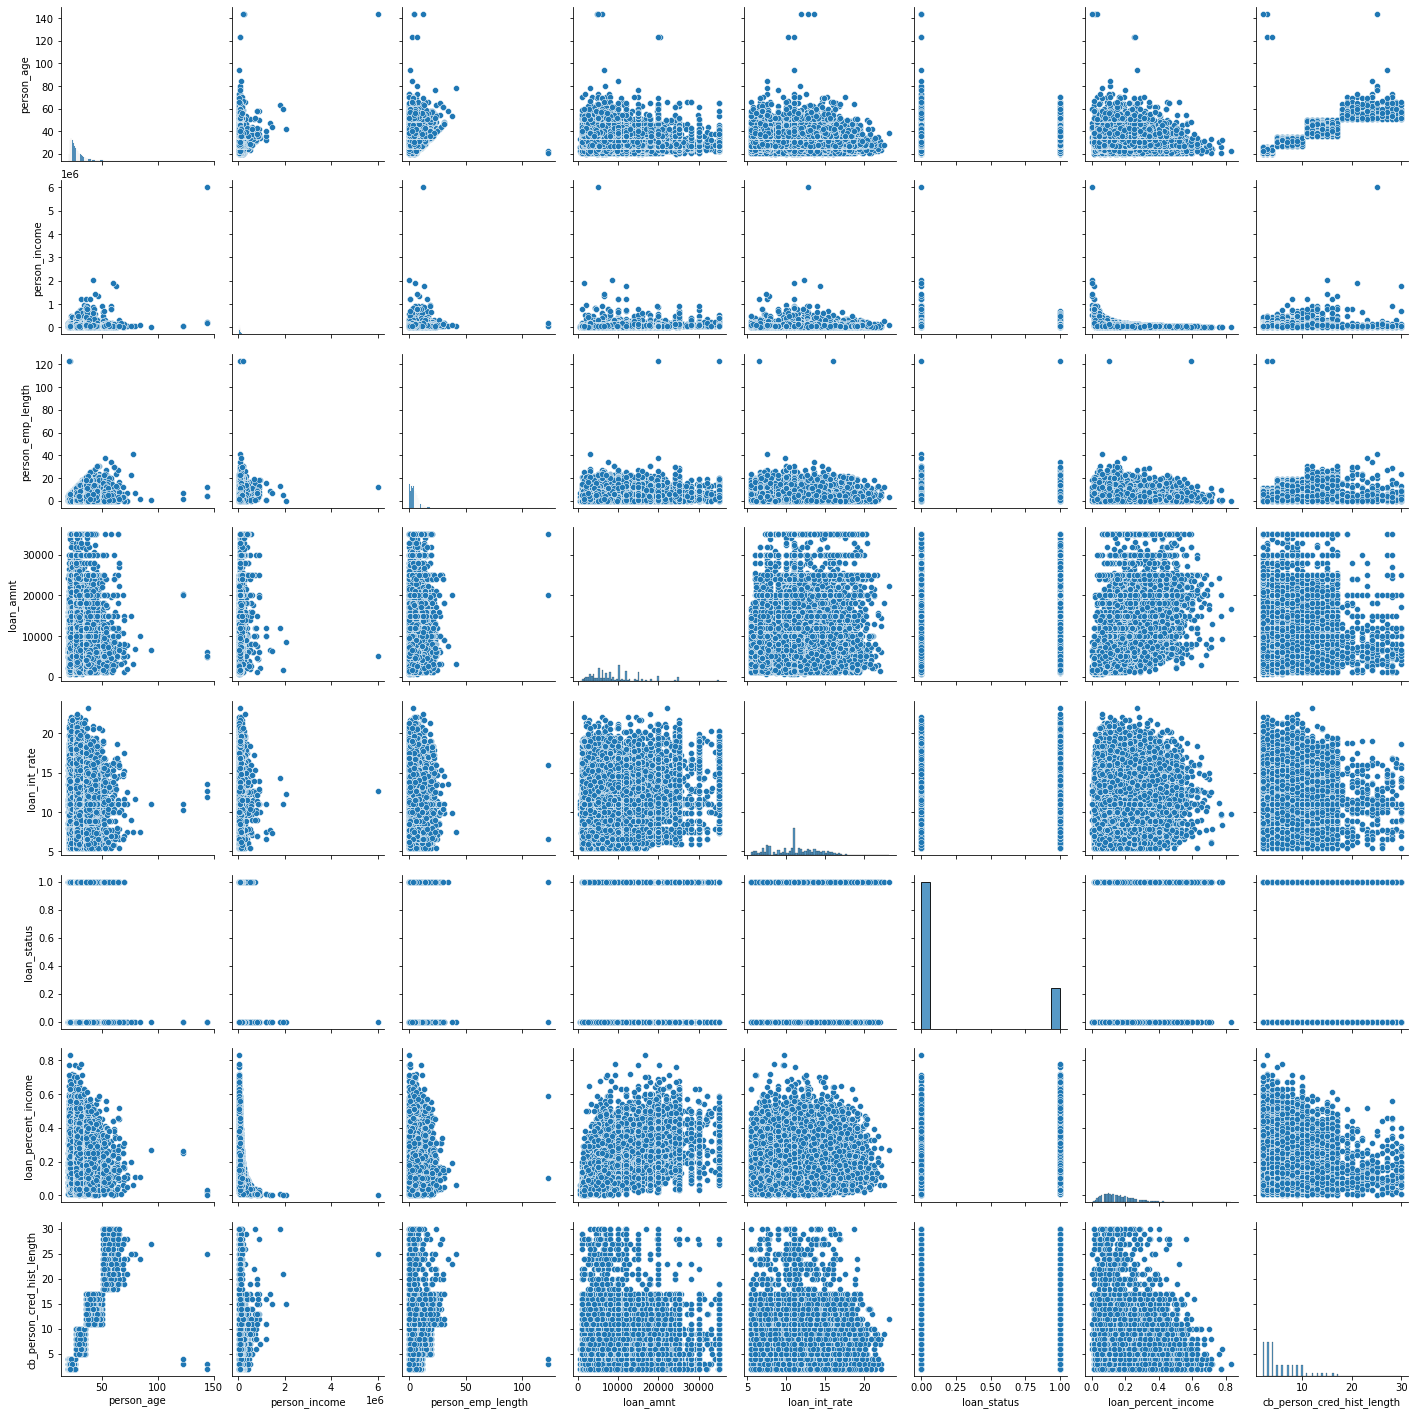

In [11]:
sns.pairplot(df)

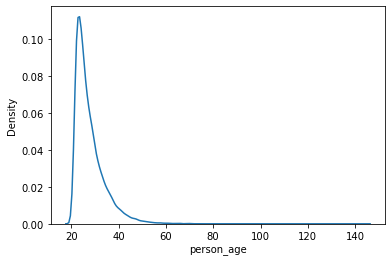

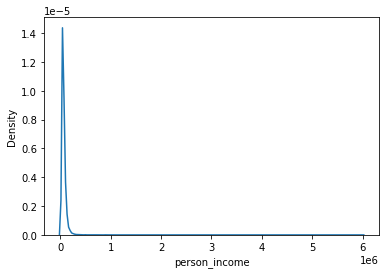

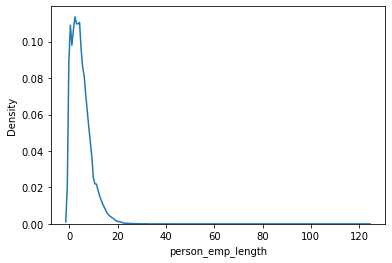

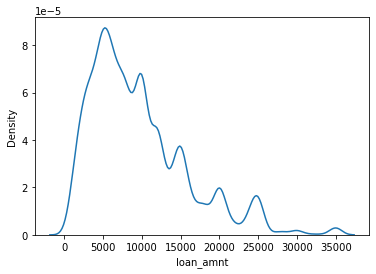

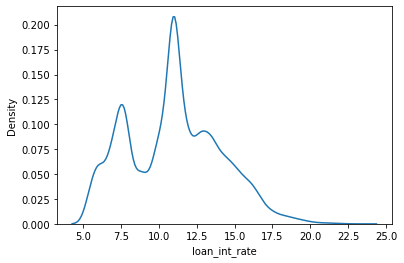

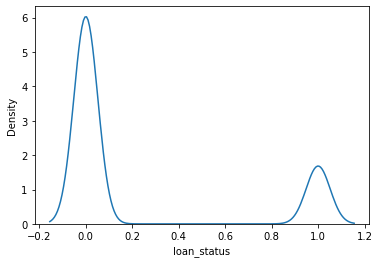

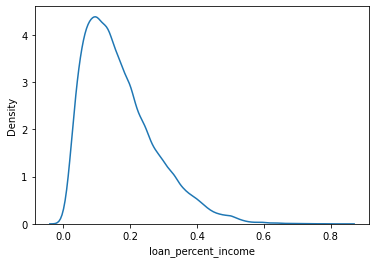

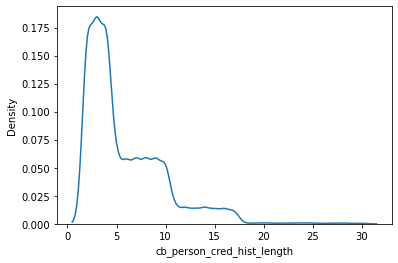

In [12]:
for i in num_col.columns:
    sns.kdeplot(i, data = df)
    plt.show()

### Handling outliers

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


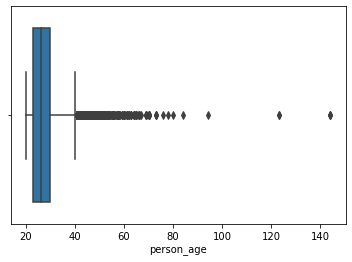

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


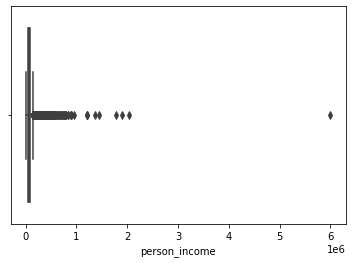

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


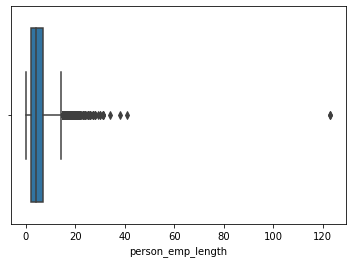

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


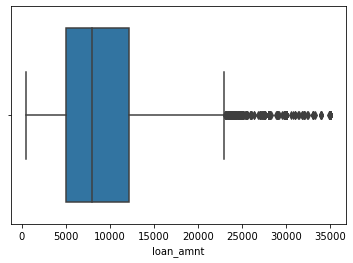

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


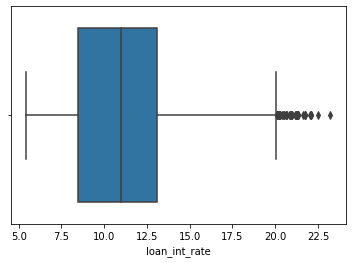

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


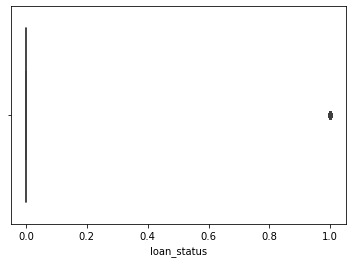

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


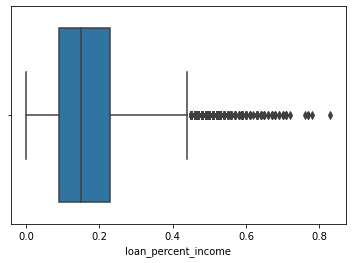

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


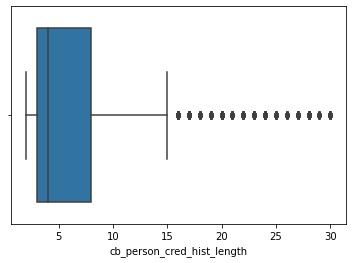

In [13]:
for i in num_col.columns:
    sns.boxplot(i, data = df)
    plt.show()

In [14]:
print('Age is greater than 100 which is an outlier')

Age is greater than 100 which is an outlier


In [15]:
df = df[df['person_age']<=100]

In [16]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### checking for any duplicates

In [17]:
print("Total duplicate rows: ",df.duplicated().sum())

Total duplicate rows:  165


In [18]:
df = df.drop_duplicates()

### Feature engineering

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
OneHot = OneHotEncoder(drop = 'first', sparse=False, dtype = np.int64)

In [21]:
encodel_char = pd.DataFrame(OneHot.fit_transform(char_col), columns = OneHot.get_feature_names(), index = char_col.index)

In [22]:
new_df = pd.concat([num_col, encodel_char], axis = 1)

In [23]:
new_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,x0_OTHER,x0_OWN,x0_RENT,x1_EDUCATION,x1_HOMEIMPROVEMENT,x1_MEDICAL,x1_PERSONAL,x1_VENTURE,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x3_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


### train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = new_df.drop('loan_status', axis = 1)
y = new_df['loan_status']

In [26]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [27]:
num_col

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


<AxesSubplot:>

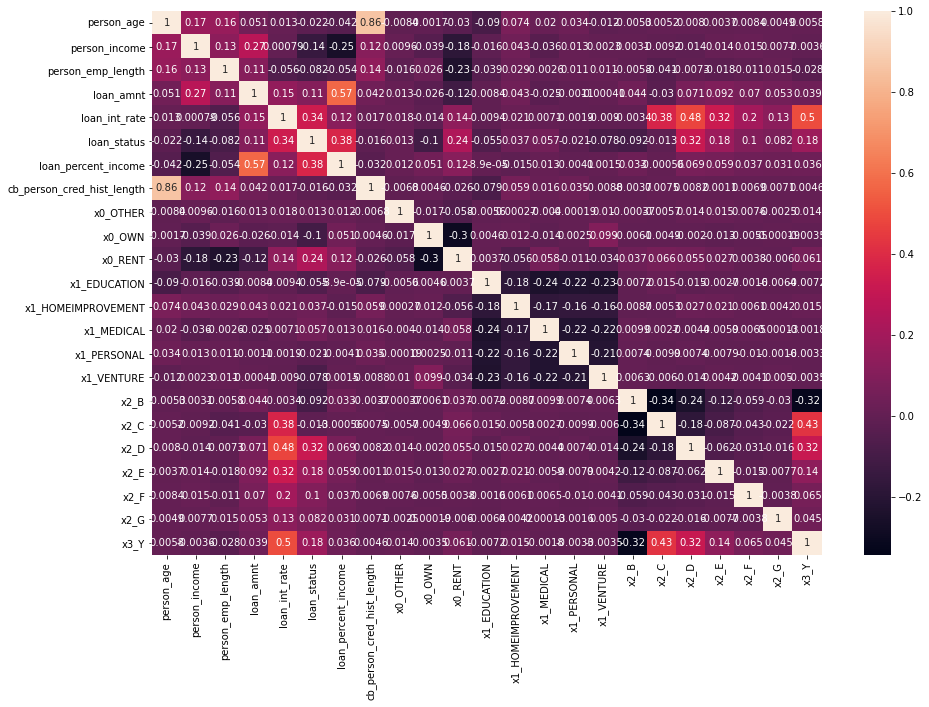

In [28]:
plt.figure(figsize = (15,10))
sns.heatmap(new_df.corr(), annot = True)

In [29]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
xgb = XGBClassifier()

In [31]:
xgb.fit(train_x, train_y)

C:\Users\Alpha Wave\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
pred_y = xgb.predict(test_x)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [34]:
accuracy_score(test_y, pred_y)

0.9353452685421995

In [35]:
confusion_matrix(test_y, pred_y)

array([[7536,   77],
       [ 555, 1607]], dtype=int64)

In [36]:
precision_recall_fscore_support(test_y,pred_y)

(array([0.93140527, 0.95427553]),
 array([0.98988572, 0.74329325]),
 array([0.95975548, 0.83567343]),
 array([7613, 2162], dtype=int64))

In [37]:
precision_score(test_y, pred_y)

0.9542755344418052

In [38]:
recall_score(test_y, pred_y)

0.7432932469935245

In [39]:
score = xgb.get_booster().get_score(importance_type='weight')

In [40]:
selected_feature = []
for i,j in dict(sorted(score.items(), key = lambda x: x[1], reverse = True)).items():
    if j>40:
        selected_feature.append(i)

In [41]:
len(selected_feature)

16

In [42]:
xgb = XGBClassifier(random_state = 42, use_label_encoder =False)

In [43]:
train_y.ravel()

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [44]:
xgb.fit(train_x[selected_feature], train_y.ravel())

[11:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
pred_y = xgb.predict(test_x[selected_feature])

In [46]:
print(accuracy_score(test_y, pred_y))
print(precision_score(test_y, pred_y))
print(recall_score(test_y, pred_y))

0.9339130434782609
0.9501187648456056
0.7400555041628122


In [47]:
confusion_matrix(test_y, pred_y)

array([[7529,   84],
       [ 562, 1600]], dtype=int64)

### HyperParameter optimization to improve model efficiency

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [49]:
params = {
    "learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1 , 3, 5, 7],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.5],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
}

In [50]:
search = RandomizedSearchCV(xgb, param_distributions = params, scoring = 'roc_auc', n_iter = 5, n_jobs = -1, cv = 5, verbose = 3)

In [51]:
search.fit(train_x[selected_feature], train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact

In [52]:
search.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [69]:
xgb = XGBClassifier(random_state = 42, 
                    use_label_encoder =False,
                    min_child_weight = 5,
                    max_depth = 6,
                    learning_rate = 0.2,
                    gamma = 0.3,
                    colsample_bytree = 0.7
                   )

In [70]:
xgb.fit(train_x[selected_feature], train_y.ravel())

[11:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [71]:
pred_y = xgb.predict(test_x[selected_feature])

In [72]:
print(accuracy_score(test_y, pred_y))
print(precision_score(test_y, pred_y))
print(recall_score(test_y, pred_y))

0.9321739130434783
0.9496100779844031
0.7321924144310823


In [73]:
pred_prob = xgb.predict_proba(test_x[selected_feature])

In [74]:
predict_prob_df = pd.DataFrame(pred_prob[:,1], columns = ["Probability"])

In [75]:
pd.concat([predict_prob_df,test_y.reset_index(drop = True)], axis = 1)

,Probability,loan_status
0,0.001931,0
1,0.395815,0
2,0.101756,0
3,0.970731,1
4,0.918052,1
...,...,...
9770,0.047016,0
9771,0.029372,0
9772,0.999526,1
9773,0.018052,0


In [77]:
thresh = np.linspace(0,1,30)
print(thresh)

[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]


In [78]:
def roc_auc_curve(predict, thr = thresh, true_y = test_y):
    data = predict
    recall = []
    precision = []
    tpr = []
    fpr = []
    acc = []
    for threshold in thr:
        data['loan_status'] = data['Probability'].apply(lambda x: 1 if x>threshold else 0)
        matrix = confusion_matrix(true_y, data['loan_status'])
        tn, fp, fn, tp = matrix.ravel()
        tpr.append(tp/(tp+fn))
        fpr.append(fp/(fp+tn))
        acc.append(accuracy_score(true_y, data['loan_status']))
        recall.append(recall_score(true_y, data['loan_status']))
        precision.append(precision_score(true_y, data['loan_status']))
        
    return recall, precision, tpr, fpr, acc
        
        

In [79]:
recall, precision, tpr, fpr, acc = roc_auc_curve(predict_prob_df)

C:\Users\Alpha Wave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ploting accuracy, recall, precision and ROC_AUC curve

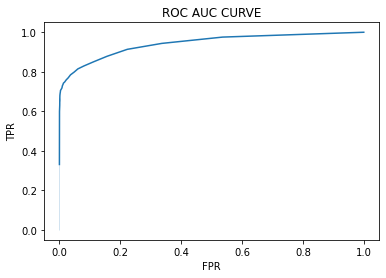

In [115]:
sns.lineplot(x = fpr, y = tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC CURVE')
plt.show()

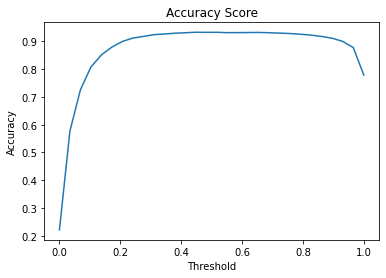

Highest accuracy 0.9327877237851663 acheived with threshold=0.4482758620689655


In [116]:
sns.lineplot(x = thresh, y = acc)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.show()
optimal_index = acc.index(max(acc))
print(f"Highest accuracy {max(acc)} acheived with threshold={thresh[optimal_index]}")

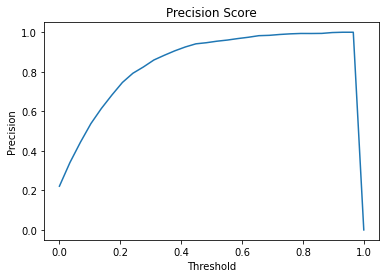

Highest precision 1.0 acheived with threshold=0.9310344827586207


In [117]:
sns.lineplot(x = thresh, y = precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision Score')
plt.show()
optimal_index = precision.index(max(precision))
print(f"Highest precision {max(precision)} acheived with threshold={thresh[optimal_index]}")

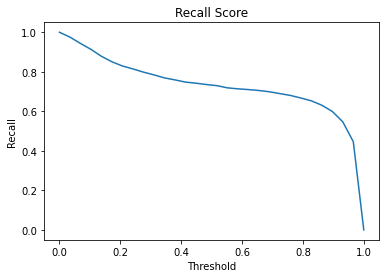

Highest recall 1.0 acheived with threshold=0.0


In [118]:
sns.lineplot(x = thresh, y = recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Score')
plt.show()
optimal_index = recall.index(max(recall))
print(f"Highest recall {max(recall)} acheived with threshold={thresh[optimal_index]}")

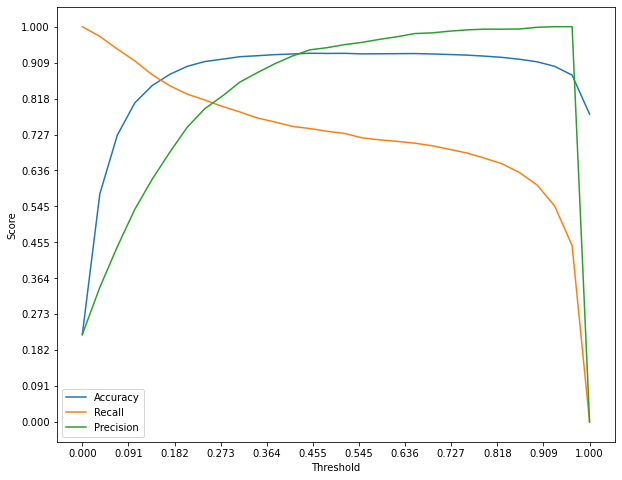

In [84]:
plt.figure(figsize = (10,8))
sns.lineplot(x = thresh, y = acc)
sns.lineplot(x = thresh, y = recall)
sns.lineplot(x = thresh, y = precision)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(np.linspace(0,1,12))
plt.yticks(np.linspace(0,1,12))
plt.legend(labels = ['Accuracy','Recall','Precision'])
plt.show()